In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#Reading the dataset
df = pd.read_csv('final_set.csv')

In [3]:
df.shape

(128, 6)

In [6]:
#Preprocessing the dataset

#Converting words to integer values
def convert_to_int(word):
    word_dict = {
        "Arusha": 1,
        "Dar es salaam": 2,
        "Dodoma" : 3,
        "Geita" : 4,
        "Iringa" : 5,
        "Kagera" : 6,
        "Katavi" : 7,
        "Kigoma" : 8,
        "Kilimanjaro" : 9,
        "Lindi" : 10,
        "Manyara" : 11,
        "Mara" : 12,
        "Mbeya" : 13,
        "Morogoro" : 14,
        "Mtwara" : 15,
        "Mwanza" : 16,
        "Njombe": 17,
        "Pwani" : 18,
        "Rukwa" : 19,
        "Ruvuma" : 20,
        "Shinyanga" : 21,
        "Simiyu" : 22,
        "Singida" : 23,
        "Songwe" : 24,
        "Tabora" : 25,
        "Tanga" : 26
    }
    return word_dict[word]



def convert_to_int2(word):
    word_dict = {
        "Rural": 0,
        "Urban": 1
    }
    return word_dict[word]




#Encoding region
df["Region"] = df["Region"].apply(lambda x : convert_to_int(x))

#Encoding region
df["Rural/Urban"] = df["Rural/Urban"].apply(lambda x : convert_to_int2(x))

In [9]:
#Creating variables X and y
X = df.iloc[:,:3].values
y = df.iloc[:,-1].values

In [57]:
#splitting the data into train and test
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=45)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,test_size=0.25, random_state=101)

## GNB

In [58]:
#create a Gaussian classifier
model = GaussianNB()

#train models with training data
model.fit(X_train,y_train)

#response prediction for test data
y_pred = model.predict(X_test)

In [59]:
# Saving model to disk
pickle.dump(model, open('model.pkl','wb'))

In [60]:
df.head(10)

,Region,Rural/Urban,Year,Positive,Tested,Prevalence
0,1,0,2015,28,153,18
1,1,0,2019,28,191,15
2,1,0,2021,406,2264,18
3,1,1,2019,28,227,12
4,1,1,2021,99,712,14
5,2,0,2021,627,5256,12
6,2,1,2015,43,410,10
7,2,1,2017,49,721,7
8,2,1,2019,33,736,4
9,3,0,2019,30,256,12


In [65]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[1,0,2021]]))

[18]


In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"""OUTPUT:
The Mean absolute error is : {mae}
The Mean squared error is : {mse}""")

OUTPUT:
The Mean absolute error is : 15.1875
The Mean squared error is : 335.1875


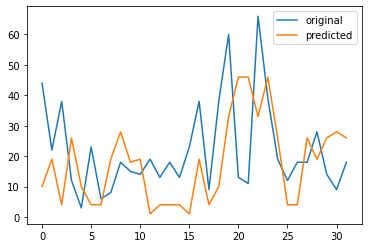

In [67]:
import matplotlib.pyplot as plt 

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.legend()
plt.show()